In [32]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [33]:
import matplotlib as mpl
mpl.rcParams['svg.fonttype'] = 'none'

## PLASMIDS CAPACITY UNDER FLUCTUATING ENVIRONMENTS

In [34]:
repertory='simulated_data/figure_S1_plasmid1/'

In [35]:
stress_vector=np.arange(1,101,1)
n=np.size(stress_vector)
plasmid1_density=np.zeros((n,n))

for i in range(n):
    for j in range(n):
        data=np.loadtxt(repertory+'d1='+str(stress_vector[i])+"_d2="+str(stress_vector[j])+".csv", delimiter=',')
        t=data[:,0]
        T=t[-1]
        plasmid=data[:,2]
        period=stress_vector[i]+stress_vector[j]
        period1=np.argmin(np.abs(t - T+period))
        plasmid1_density[i,j]=np.mean(np.log10(plasmid[period1:]))

In [36]:
repertory='simulated_data/figure_S1_plasmid2/'

In [37]:
stress_vector=np.arange(1,101,1)
n=np.size(stress_vector)
plasmid2_density=np.zeros((n,n))

for i in range(n):
    for j in range(n):
        data=np.loadtxt(repertory+'d1='+str(stress_vector[i])+"_d2="+str(stress_vector[j])+".csv", delimiter=',')
        t=data[:,0]
        T=t[-1]
        plasmid=data[:,2]
        period=stress_vector[i]+stress_vector[j]
        period1=np.argmin(np.abs(t - T+period))
        plasmid2_density[i,j]=np.mean(np.log10(plasmid[period1:]))

In [38]:
plasmid1_density_bis=np.transpose(plasmid1_density)
plasmid2_density_bis=np.transpose(plasmid2_density)

/tmp/ipykernel_12539/1357861075.py:31: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout(rect=[0, 0, 0.825, 1])


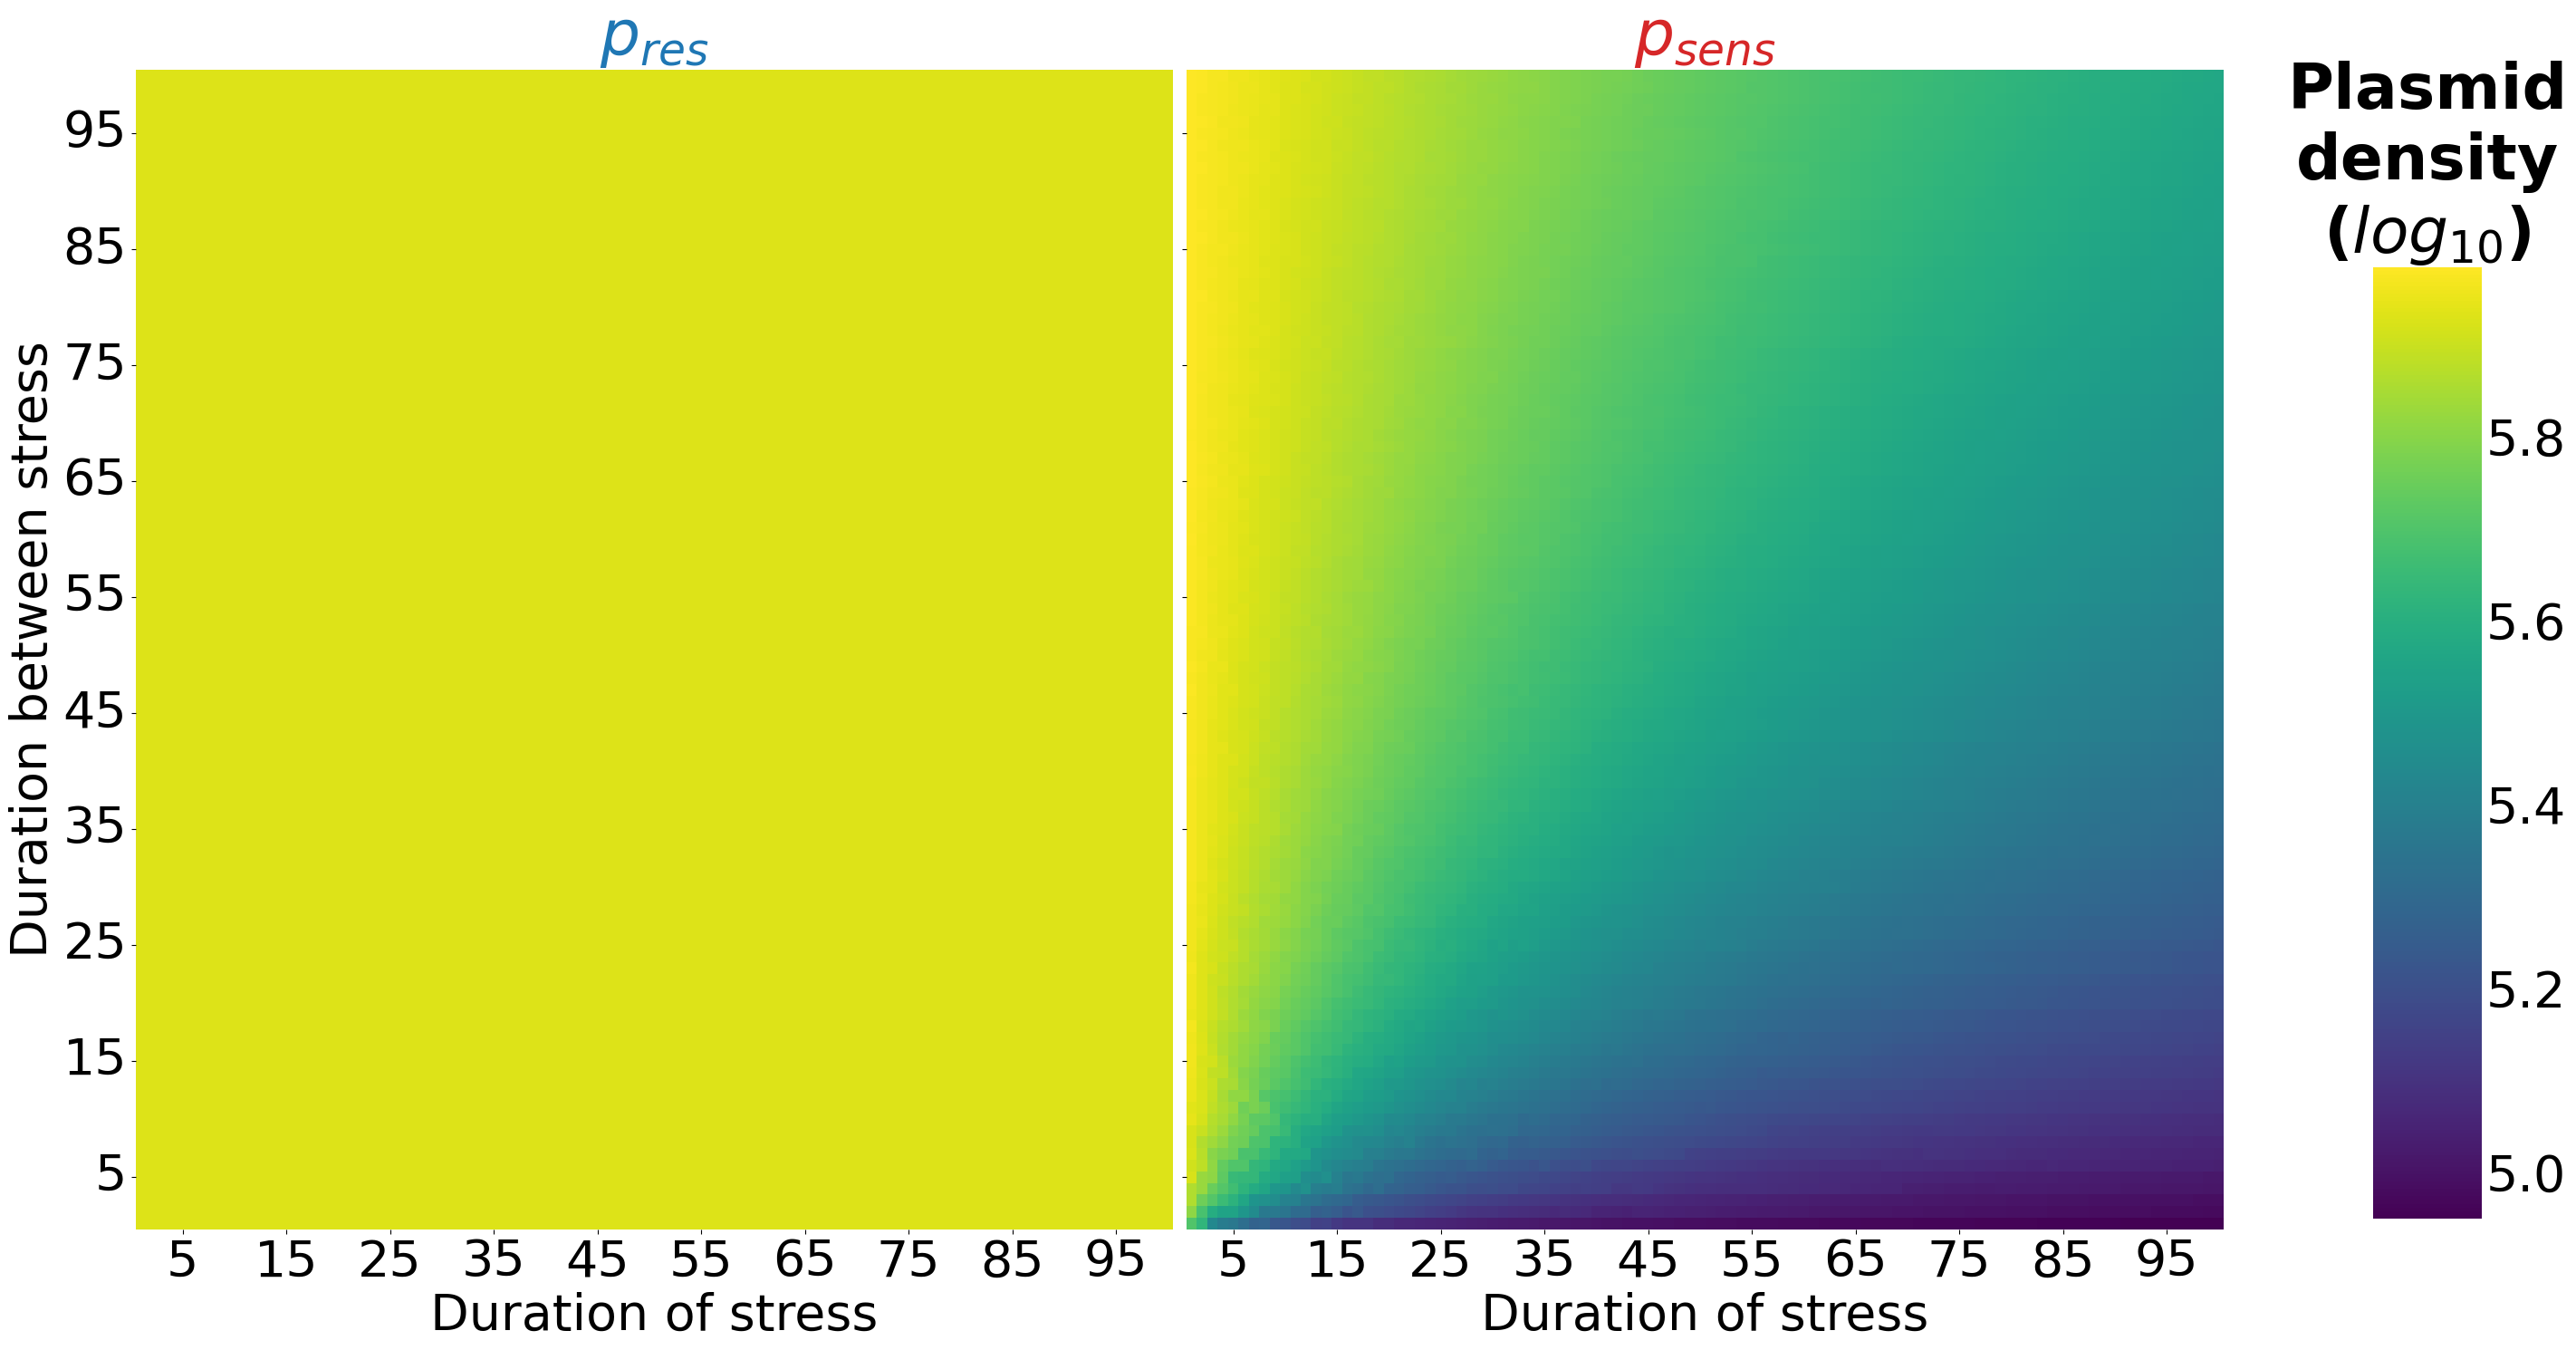

In [39]:
stress_vector_graphe=np.arange(5,101,10)

fig, axs = plt.subplots(1,2,figsize=(30,15),sharex=True,sharey=True)
cbar_ax = fig.add_axes([.875, .1, .04, .7])

#cmap = LinearSegmentedColormap.from_list("custom", colors, N=2)
v_min=np.minimum(np.min(plasmid1_density_bis),np.min(plasmid2_density_bis))
v_max=np.maximum(np.max(plasmid1_density_bis),np.max(plasmid2_density_bis))

sns.heatmap(plasmid1_density_bis,linewidths=0,cmap="viridis",cbar=False,ax=axs[0],vmin=v_min,vmax=v_max)
sns.heatmap(plasmid2_density_bis,linewidths=0,cmap="viridis",cbar_ax=cbar_ax,ax=axs[1],vmin=v_min,vmax=v_max)

axs[0].invert_yaxis()
axs[0].set_ylabel('Duration between stress', size=40)
axs[0].set_xlabel('Duration of stress', size=40)
axs[0].set_title("$p_{res}$",size=50,weight="bold",color='tab:blue')
axs[0].set_xticks(stress_vector_graphe-0.5)
axs[0].set_xticklabels(stress_vector_graphe,rotation=0,size=40)
axs[0].set_yticks(stress_vector_graphe-0.5)
axs[0].set_yticklabels(stress_vector_graphe,rotation=0,size=40)

axs[1].set_xticks(stress_vector_graphe-0.5)
axs[1].set_xticklabels(stress_vector_graphe,rotation=0,size=40)
axs[1].set_xlabel('Duration of stress', size=40)
axs[1].set_title("$p_{sens}$",size=50,weight="bold",color='tab:red')

cbar_ax.tick_params(labelsize=40,length=0)
cbar_ax.set_title('Plasmid\ndensity\n($log_{10}$)',size=50,weight="bold",ha="center")
cbar = axs[1].collections[0].colorbar

fig.tight_layout(rect=[0, 0, 0.825, 1])
plt.show()

## TEMPORAL DYNAMICS UNDER FLUCTUATING ENVIRONMENT

In [9]:
def construction_stress_periodic_1(T,dt,d1,d2,i_min,i_max):
    # d1: stress duration
    # d2: no stress duration
    # i_min, i_max: min and max stress intensity
    
    stress=np.array([])
    
    while np.size(stress)<=int(T/dt):
        stress=np.concatenate((stress,np.zeros(int(d2/dt)),np.repeat(np.random.uniform(i_min,i_max),int(d1/dt))))
    
    return stress[:(int(T/dt)+1)]

In [10]:
def mges_incompatibles_deterministe(t,B,a,s,e,r,d):
    # a: plasmid horizontal transfer rate
    # s: resistance level
    # e: plasmid vertical transfer rate
    # r: replication rate
    # d: death rate

    N=np.sum(B)
    
    Y0=(r[0]-f1(t,s[0])-d*N)*B[0]-np.sum(B[1:]*np.dot(a,B[0]))+np.sum(B[1:]*r[1:]*(1-e))
    Y=(r[1:]*e-f1(t,s[1:])-d*N)*B[1:]+B[1:]*np.dot(a,B[0])
    Y=list(Y)
    Y.insert(0,Y0)
    return(np.array(Y))

In [17]:
def f1(t,s):
    return S1[int(t/0.1)]*(1-s)

T=1000
no_stress_d=50
stress_d=40
period=no_stress_d+stress_d
d=1e-6
alpha=np.array([1e-6,1e-5])
s=np.array([0,1,0])
e=np.array([0.95,0.9])
r=np.array([1,0.9,0.99])

B=np.array([1e6/3,1e6/3,1e6/3])

S1=construction_stress_periodic_1(T,0.1,stress_d,no_stress_d,0.9,0.9)
solution1 = solve_ivp(mges_incompatibles_deterministe,[0,1000],B,args=[alpha,s,e,r,d],max_step=0.5)

In [18]:
period1=np.argmin(np.abs(solution1.t - T+period))
period2=np.argmin(np.abs(solution1.t - T+2*period))
period3=np.argmin(np.abs(solution1.t - T+3*period))
period4=np.argmin(np.abs(solution1.t - T+4*period))

p1_1=np.min(np.log10(solution1.y[1,period1:]))
p1_2=np.min(np.log10(solution1.y[1,period2:period1]))
p1_3=np.min(np.log10(solution1.y[1,period3:period2]))
p1_4=np.min(np.log10(solution1.y[1,period4:period3]))

p2_1=np.min(np.log10(solution1.y[2,period1:]))
p2_2=np.min(np.log10(solution1.y[2,period2:period1]))
p2_3=np.min(np.log10(solution1.y[2,period3:period2]))
p2_4=np.min(np.log10(solution1.y[2,period4:period3]))

time1_1=np.where(np.log10(solution1.y[1])==p1_1)
time1_2=np.where(np.log10(solution1.y[1])==p1_2)
time1_3=np.where(np.log10(solution1.y[1])==p1_3)
time1_4=np.where(np.log10(solution1.y[1])==p1_4)

time2_1=np.where(np.log10(solution1.y[2])==p2_1)
time2_2=np.where(np.log10(solution1.y[2])==p2_2)
time2_3=np.where(np.log10(solution1.y[2])==p2_3)
time2_4=np.where(np.log10(solution1.y[2])==p2_4)

In [19]:
time=np.array([period4,period3,period2,period1])
plasmid1_density_log10=np.array([p1_4,p1_3,p1_2,p1_1])
plasmid2_density_log10=np.array([p2_4,p2_3,p2_2,p2_1])
time1=np.array(solution1.t[[time1_4,time1_3,time1_2,time1_1]])
time2=np.array(solution1.t[[time2_4,time2_3,time2_2,time2_1]])

In [22]:
reg1 = LinearRegression().fit(time1.reshape(-1,1),plasmid1_density_log10.reshape(-1,1))
a1 = reg1.coef_
b1 = reg1.intercept_
print(a1)
print(b1)

[[1.19105462e-08]]
[5.93195535]


In [23]:
reg2 = LinearRegression().fit(time2.reshape(-1,1),plasmid2_density_log10.reshape(-1,1))
a2 = reg2.coef_
b2 = reg2.intercept_
print(a2)
print(b2)

[[-0.0081745]]
[-4.37634687]


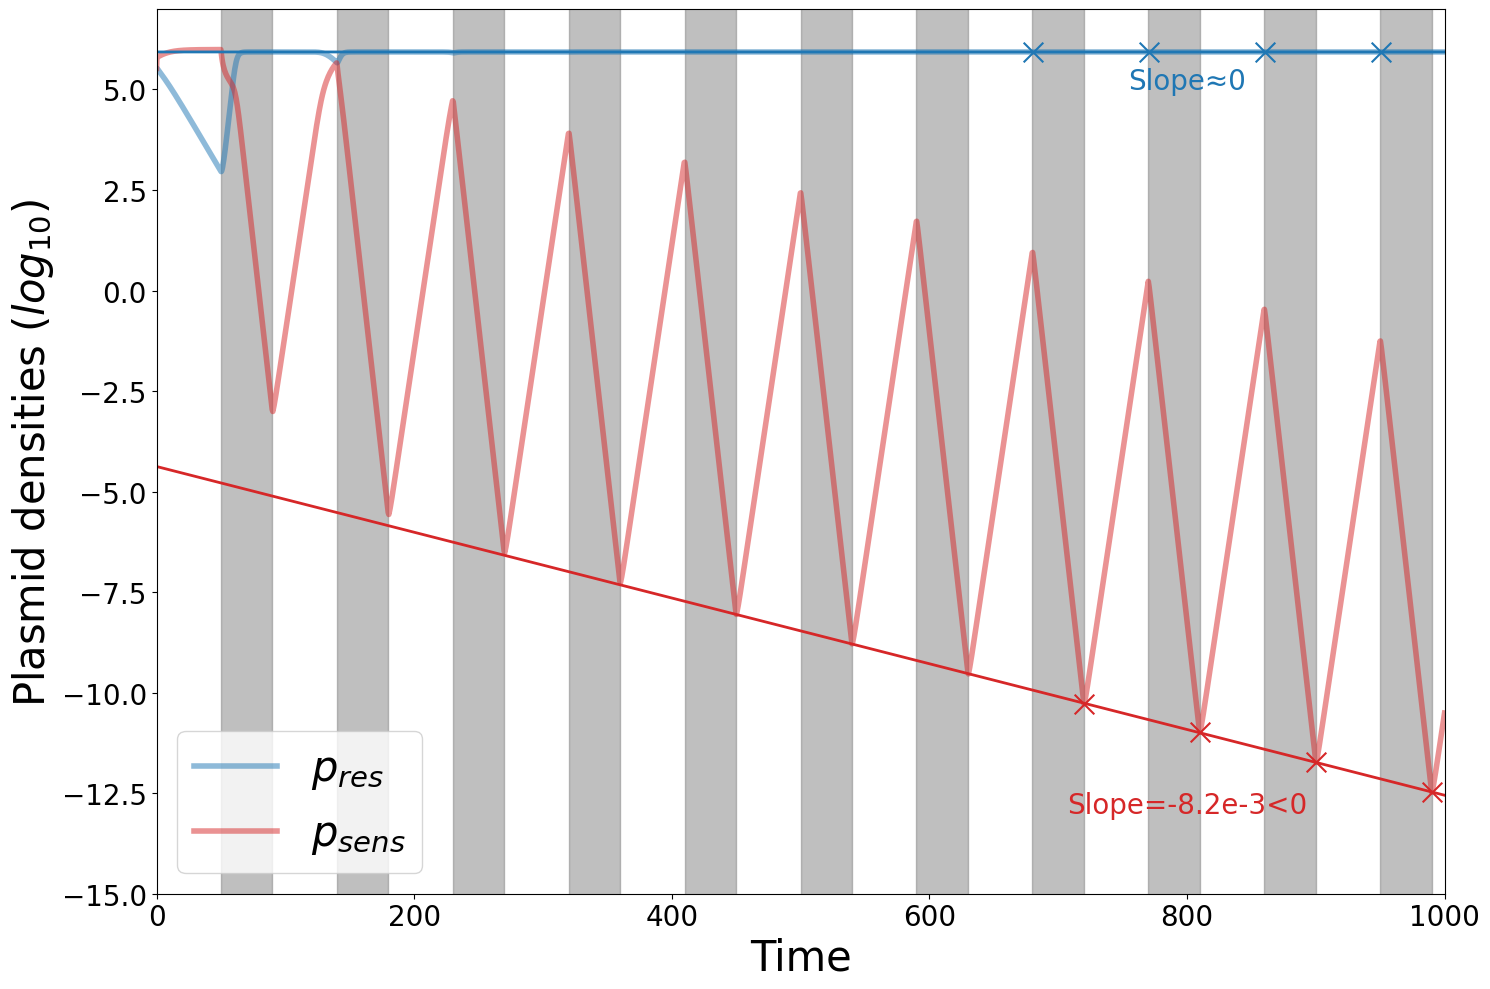

In [26]:
fig, axs=plt.subplots(1,1,figsize=(15,10))

axs.plot(solution1.t,np.log10(solution1.y[1]),color="tab:blue",label="$p_{res}$",linewidth=4,alpha=0.5)
axs.plot(solution1.t,np.log10(solution1.y[2]),color="tab:red",label="$p_{sens}$",linewidth=4,alpha=0.5)
for i in range(1,20):
    axs.fill_between(np.linspace(i*no_stress_d+(i-1)*stress_d,i*(no_stress_d+stress_d),2),-100,10,alpha=0.5,color='grey')

axs.scatter(time1,plasmid1_density_log10,color='tab:blue',marker='x',s=200)
axs.scatter(time2,plasmid2_density_log10,color='tab:red',marker='x',s=200)

axs.plot(solution1.t,b1+a1[0]*solution1.t,color='tab:blue',linewidth=2)
axs.plot(solution1.t,b2+a2[0]*solution1.t,color='tab:red',linewidth=2)

axs.set_xlabel('Time',size=30)
axs.set_ylabel('Plasmid densities ($log_{10}$)',size=30)

axs.set_ylim(-15,7)
axs.set_xlim(0,1000)

axs.text(800,5,'Slope≈0',ha='center',fontsize=20,color="tab:blue")
axs.text(800,-13,'Slope=-8.2e-3<0',ha='center',fontsize=20,color="tab:red")

axs.tick_params("both",labelsize=20)

plt.legend(fontsize=30)

plt.tight_layout(rect=[0, 0, 1, 1])
plt.show()

## PLASMID COMPETITION AND FITNESS

In [7]:
def R_fun(s,e=1,s_max=1,Rmin=0.9,Rmax=0.99):
    r=Rmax+(Rmin-Rmax)*(s/s_max)/(e-(e-1)*(s/s_max))
    return(r)

def e_log(a,e=1,a_min=1e-12,a_max=1e-5,e_min=0.9,e_max=0.99):
    a=a_max*(np.log10(a)-np.log10(a_min))/(np.log10(a_max)-np.log10(a_min))
    epsilon=e_max+(e_min-e_max)*(a/a_max)/(e-(e-1)*(a/a_max))
    return(epsilon)

### No stress

In [17]:
def f1(t,s):
    return 0*(1-s)

n=200

d=1e-6
alpha=10**(np.linspace(-7,-5,n))
s=np.repeat(0,n)
s=np.concatenate(([0],s))
r=np.ones(n+1)
e=e_log(alpha,1)
r[1:]=R_fun(s[1:],1)

B=np.concatenate(([1e5],np.repeat(10,n)))
solution1 = solve_ivp(mges_incompatibles_deterministe,[0,2000],B,args=[alpha,s,e,r,d],max_step=1)

In [30]:
d=1e-6
alpha=1e-5
s=np.array([0,0])
e=0.9
r=np.array([1,0.99])

B=np.array([1e6/2,1e6/2])
equilibre = solve_ivp(mges_incompatibles_deterministe,[0,10000],B,args=[alpha,s,e,r,d],max_step=1)
print(equilibre.y[:,-1])

def fitness(B,r,s,e,a,c,d):
    return r*e-c*(1-s)-d*np.sum(B)+a*B[0]

n=200
s=0
a=10**(np.linspace(-7,-5,n))
e=e_log(a,1)
r=0.99
c=0

f=fitness(equilibre.y[:,-1],r,s,e,a,c,d)

[  9913.53174353 980186.555233  ]


In [24]:
n=200

d=1e-6
alpha=10**(np.linspace(-7,-5,n))
s=np.array([0,0])
r=np.array([1,0.99])

B=np.array([1e5,10])

carrying_capacity=np.zeros(n)
for i in range(n):
    a=alpha[i]
    e=np.array([e_log(a,1)])
    solution = solve_ivp(mges_incompatibles_deterministe,[0,1000],B,args=[a,s,e,r,d],max_step=1)
    carrying_capacity[i]=solution.y[1,-1]

In [25]:
time=[0,50,100,500,1000,2000]

time_dict = {1: 't=0',
              2: 't=50',
              3: 't=100',
              4: 't=500',
              5: 't=1.000',
              6: 't=2.000'}

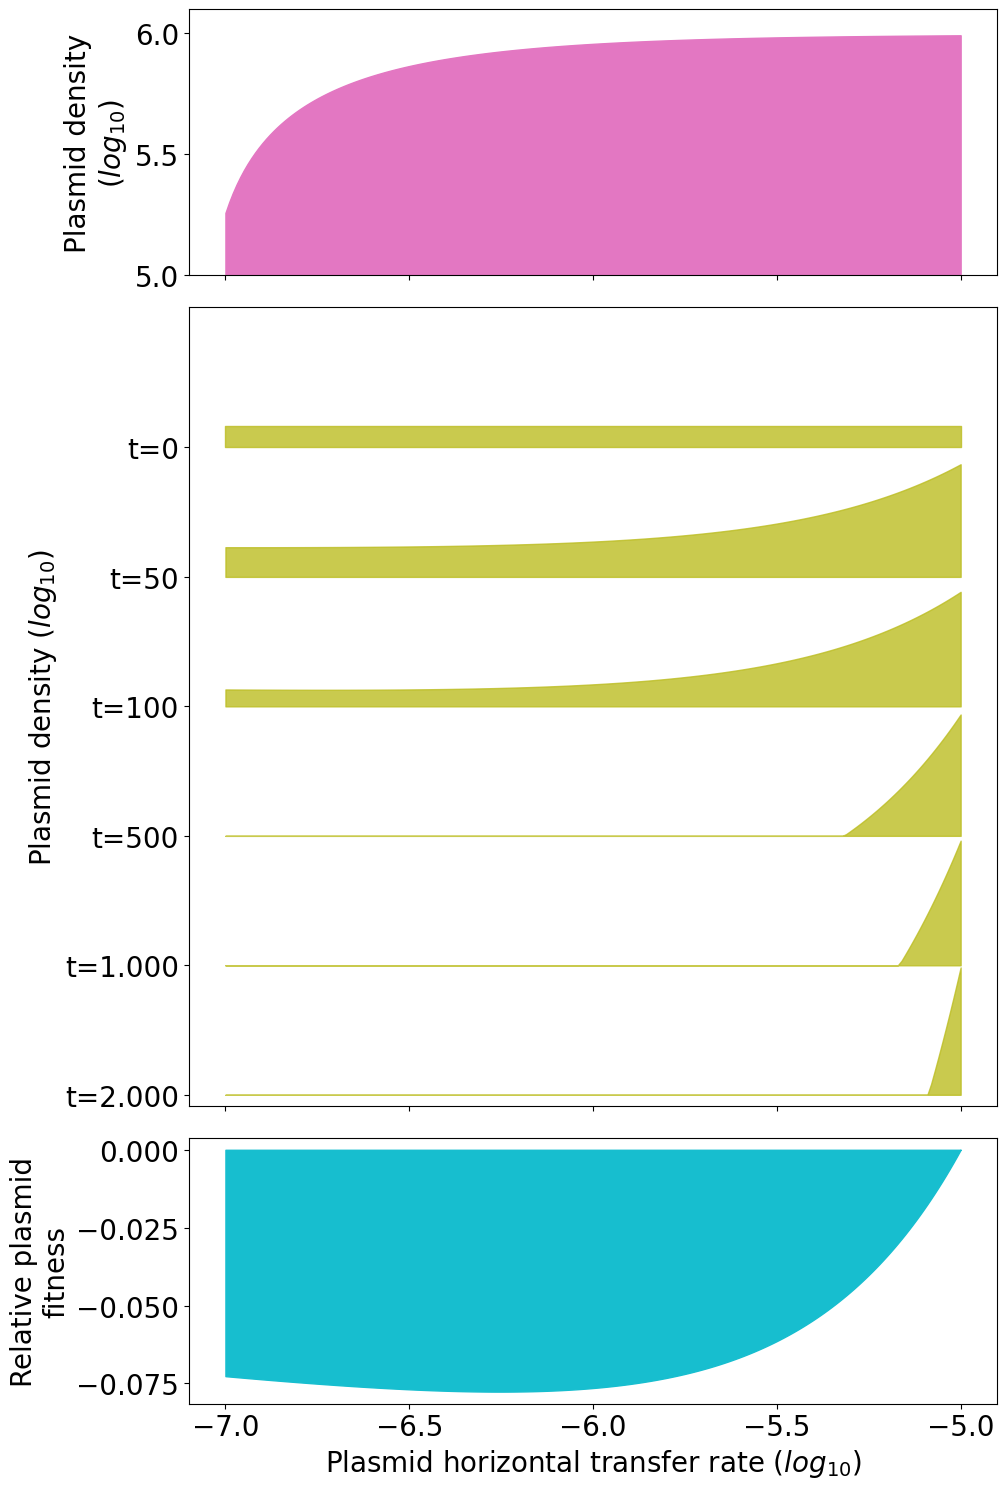

In [28]:
fig,axs=plt.subplots(3,1,figsize=(10, 15),sharex=True, gridspec_kw={'height_ratios': [1, 3, 1]})

# Panel 1
axs[0].fill_between(np.log10(alpha),np.log10(carrying_capacity),color="tab:pink")
axs[0].set_ylabel("Plasmid density\n($log_{10}$)", size=20)
axs[0].tick_params("y",labelsize=20)
axs[0].set_ylim(5,6.1)

# Panel 2
offsets = [0, 6, 6+6, 6*2+6, 6*3+6, 6*4+6]

for i, offset in enumerate(offsets):
    axs[1].fill_between(
        np.log10(alpha),
        np.maximum(np.log10(solution1.y[1:, time[5-i]]) + offset,offset),  # y-axis (shifted)
        offset,
        #color=palette(i),
        color="tab:olive",
        #label=f"Distribution {i+1}",
        alpha=0.8
    )
    axs[1].set_ylim(0,6)

axs[1].set_ylabel("Plasmid density ($log_{10}$)", size=20)
axs[1].set_ylim(-0.5, max(offsets) + 6.5)
axs[1].set_yticks(ticks=offsets)
axs[1].set_yticklabels([f"{time_dict[6-i]}" for i in range(len(offsets))])
axs[1].tick_params("y",labelsize=20)

# Panel 3
axs[2].fill_between(np.log10(alpha),f,color="tab:cyan")
axs[2].set_xlabel("Plasmid horizontal transfer rate ($log_{10}$)", size=20)
axs[2].set_ylabel("Relative plasmid\nfitness", size=20)
axs[2].set_xticks([-7,-6.5,-6,-5.5,-5])
axs[2].tick_params("both",labelsize=20)

plt.tight_layout()
plt.show()

### Constant high stress

In [33]:
def f1(t,s):
    return 0.9*(1-s)

n=200

d=1e-6
alpha=1e-6
s=np.linspace(0,1,n)
s=np.concatenate(([0],s))
r=np.ones(n+1)
e=np.array([0.95])
r[1:]=R_fun(s[1:],1)

B=np.concatenate(([1e5],np.repeat(10,n)))
solution1 = solve_ivp(mges_incompatibles_deterministe,[0,2000],B,args=[alpha,s,e,r,d],max_step=1)

In [34]:
d=1e-6
alpha=1e-6
s=np.array([0,1])
e=np.array([0.95])
r=np.array([1,0.9])

B=np.array([1e6/2,1e6/2])
equilibre = solve_ivp(mges_incompatibles_deterministe,[0,10000],B,args=[alpha,s,e,r,d],max_step=1)
print(equilibre.y[:,-1])

def fitness(B,r,s,e,a,c,d):
    return r*e-c*(1-s)-d*np.sum(B)+a*B[0]

n=200
s=np.linspace(0,1,n)
a=1e-6
e=np.array([0.95])
r=R_fun(s,1)
c=0.9

f=fitness(equilibre.y[:,-1],r,s,e,a,c,d)

[ 23552.95545909 855000.        ]


In [35]:
n=200

d=1e-6
alpha=1e-6
res=np.linspace(0,1,n)
e=np.array([0.95])
B=np.array([1e5,10])

carrying_capacity=np.zeros(n)
for i in range(n):
    s=np.concatenate(([0],[res[i]]))
    r=np.concatenate(([1],[R_fun(res[i])]))
    solution = solve_ivp(mges_incompatibles_deterministe,[0,1000],B,args=[alpha,s,e,r,d],max_step=1)
    carrying_capacity[i]=solution.y[1,-1]

In [36]:
time=[0,50,100,500,1000,2000]

time_dict = {1: 't=0',
              2: 't=50',
              3: 't=100',
              4: 't=500',
              5: 't=1.000',
              6: 't=2.000'}

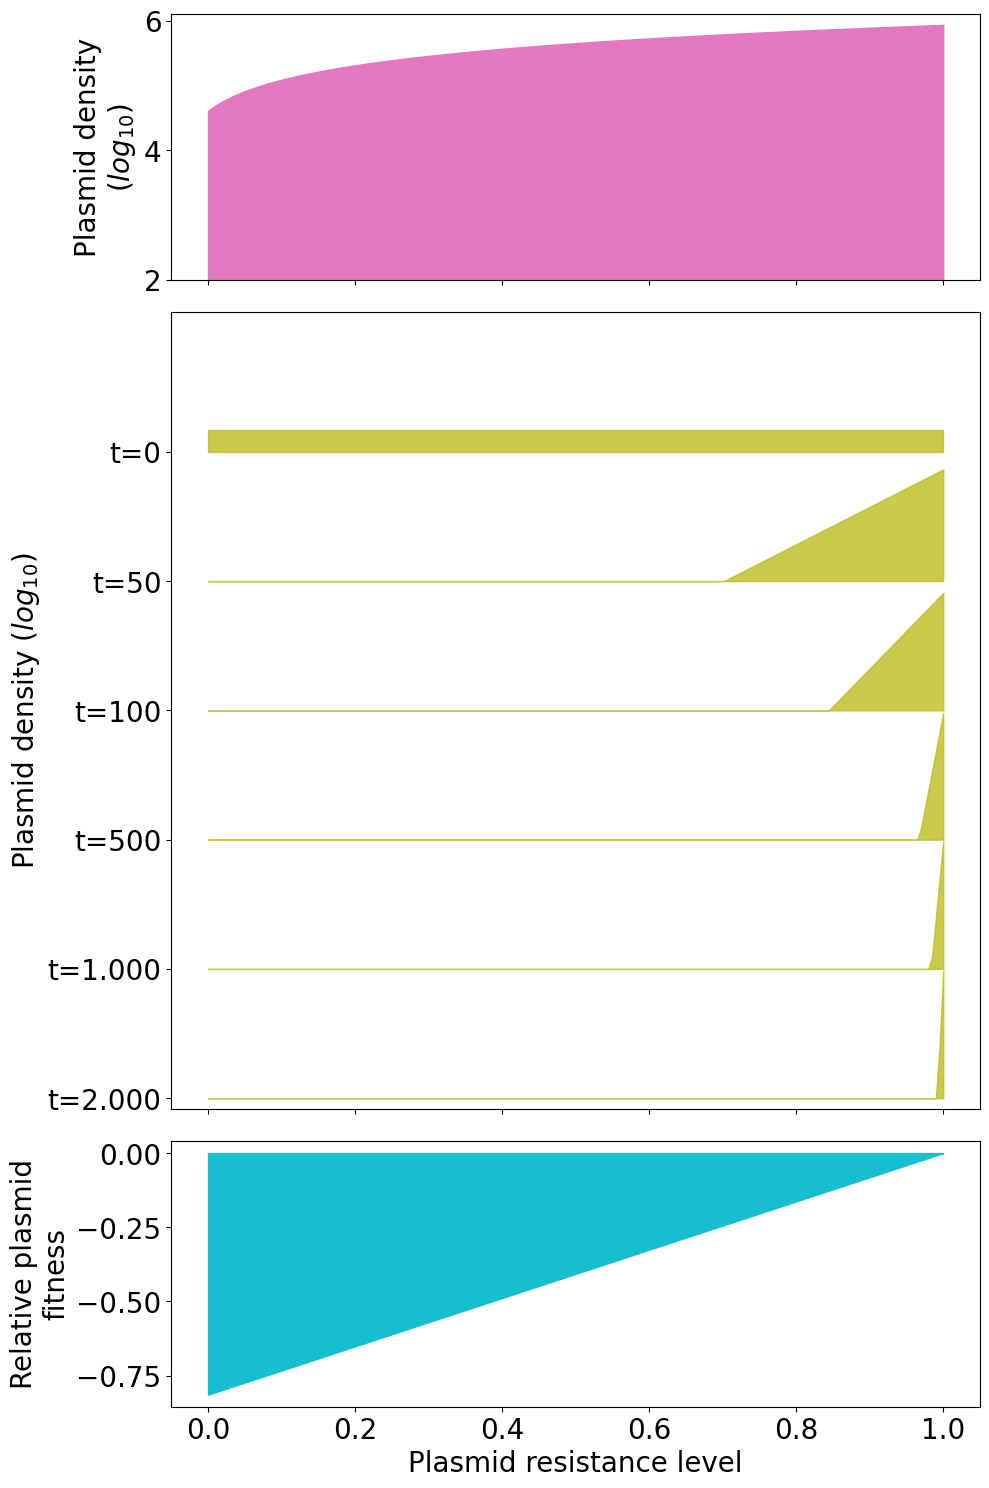

In [37]:
fig,axs=plt.subplots(3,1,figsize=(10, 15),sharex=True, gridspec_kw={'height_ratios': [1, 3, 1]})

# Panel 1
axs[0].fill_between(res,np.log10(carrying_capacity),color="tab:pink")
axs[0].set_ylabel("Plasmid density\n($log_{10}$)", size=20)
axs[0].tick_params("y",labelsize=20)
axs[0].set_ylim(2,6.1)

# Panel 2
offsets = [0, 6, 6+6, 6*2+6, 6*3+6, 6*4+6]

for i, offset in enumerate(offsets):
    axs[1].fill_between(
        res,
        np.maximum(np.log10(solution1.y[1:, time[5-i]]) + offset,offset), 
        offset,
        color="tab:olive",
        alpha=0.8
    )
    axs[1].set_ylim(0,6)

axs[1].set_ylabel("Plasmid density ($log_{10}$)", size=20)
axs[1].set_ylim(-0.5, max(offsets) + 6.5)
axs[1].set_yticks(ticks=offsets)
axs[1].set_yticklabels([f"{time_dict[6-i]}" for i in range(len(offsets))])
axs[1].tick_params("y",labelsize=20)

# Panel 3
axs[2].fill_between(res,f,color="tab:cyan")
axs[2].set_xlabel("Plasmid resistance level", size=20)
axs[2].set_ylabel("Relative plasmid\nfitness", size=20)
axs[2].tick_params("both",labelsize=20)

plt.tight_layout()
plt.show()